In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import requests
import json
import data_import
import gmaps
import gmaps.geojson_geometries
import api_keys

In [2]:
rest_df = data_import.get_rest_countries()

In [3]:
cia_df = data_import.get_cia_data()

In [4]:
merged_data = pd.merge(rest_df, cia_df, how = 'inner', on = 'country')

In [5]:
merged_data.to_csv("merged_data.csv")

<h1> Josh's Workspace </h1>

In [6]:
pop_low = merged_data["population"].quantile(0.1)
pop_hi  = merged_data["population"].quantile(0.90)
edu_low = merged_data['education_expenditures'].quantile(0.01)
edu_hi = merged_data['education_expenditures'].quantile(0.99)


df_filtered = merged_data[(merged_data["population"] < pop_hi) & (merged_data["population"] > pop_low) & (merged_data['education_expenditures'] > edu_low) & (merged_data['education_expenditures'] < edu_hi)]

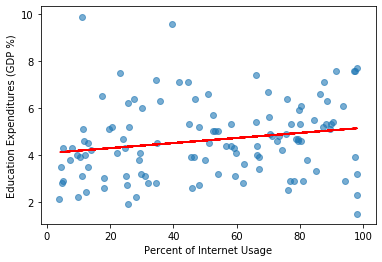

In [7]:
z = np.polyfit(df_filtered['internet_%_of_population'], df_filtered['education_expenditures'], 1)
p = np.poly1d(z)

plt.plot(df_filtered['internet_%_of_population'],p(df_filtered['internet_%_of_population']),"r--")
plt.scatter(df_filtered['internet_%_of_population'], df_filtered['education_expenditures'], alpha = .6)
plt.xlabel('Percent of Internet Usage')
plt.ylabel('Education Expenditures (GDP %)')

plt.show()

In [8]:
sub_df = df_filtered[['sub-region', 'internet_%_of_population', 'median_age', 'education_expenditures']]

In [9]:
sub_df = sub_df.groupby('sub-region').mean()

In [10]:
sub_df.head()

,internet_%_of_population,median_age,education_expenditures
sub-region,,,
Australia and New Zealand,88.350000,38.450000,5.800000
Caribbean,61.414286,34.571429,4.814286
Central America,40.385714,26.357143,4.942857
Central Asia,39.320000,27.980000,4.940000
Eastern Africa,24.375000,21.841667,4.525000


In [ ]:
# gmaps.configure(api_key = api_keys.google_key)

In [ ]:
# countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

# fig = gmaps.figure()

# gini_layer = gmaps.geojson_layer(countries_geojson)
# fig.add_layer(gini_layer)
# fig

In [ ]:
# pprint(countries_geojson['features'][0]['properties'])

In [ ]:
# len(countries_geojson['features'])

<h1>Daniela's Workspace</h1>

In [71]:
world = cia_df.iloc[[0]]

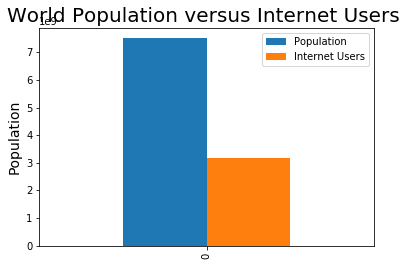

In [121]:
#plot World Population versus Internet Users

world = world[['population', 'internet_users']]
                        
world.plot(kind='bar');


plt.title("World Population versus Internet Users ",fontsize= 20)
plt.ylabel("Population", fontsize=14)
plt.legend(['Population', "Internet Users"])

plt.show()


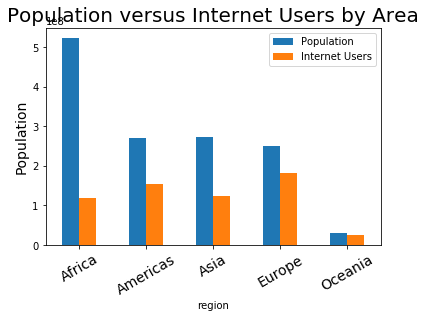

In [112]:
# Population versus Internet users by area
per_sub_area = (df_filtered[['region', 'population', 'internet_users']]).groupby(['region']).sum()

#plot
per_sub_area.plot(kind="bar")              
                      
plt.title('Population versus Internet Users by Area', fontsize=20)
plt.ylabel("Population", fontsize=14)
plt.legend(['Population', "Internet Users"]);
plt.xticks(rotation =30,fontsize =14)

plt.show()

In [11]:
# check top population, internet_users, gdp and education

top_population = merged_data[['country','population', 'median_age']]\
                            .sort_values(by=['population'],ascending=False)\
                            .head(25)

top_internet = merged_data[['country', 'internet_users']]\
                            .sort_values(by=['internet_users'], ascending=False)\
                            .head(25)

top_gdp = merged_data[['country', 'gdp_purchasing_power_parity']]\
                            .sort_values(by=['gdp_purchasing_power_parity'], ascending=False)\
                            .head(25)

top_education = merged_data[['country', 'education_expenditures']]\
                            .sort_values(by=['education_expenditures'], ascending=False)\
                            .head(25)

In [12]:
# check if top education is in: top population, top internet users and top gdp

a = top_education.assign(In_top_population=top_education.country.isin(top_population.country).astype(int))

b = top_education.assign(In_top_internet=top_education.country.isin(top_internet.country).astype(int))

c = top_education.assign(In_top_gdp=top_education.country.isin(top_gdp.country).astype(int))



# check if top population is in top internet users

d = top_population.assign(In_Top_Internet=top_population.country.isin(top_internet.country).astype(int))

# check if top gdp is in top internet users

e = top_gdp.assign(In_top_internet=top_gdp.country.isin(top_internet.country).astype(int))



w = count_educationXpopulation = a['In_top_population'].value_counts()

y = count_educationXinternet = b['In_top_internet'].value_counts()

z = count_educationXgdp = c['In_top_gdp'].value_counts()

<h1>Cesar's Workspace</h1>

<h1>Claudia's Workspace</h1>